In [1]:
# top 60 feature distribution
import numpy as np
import pandas as pd

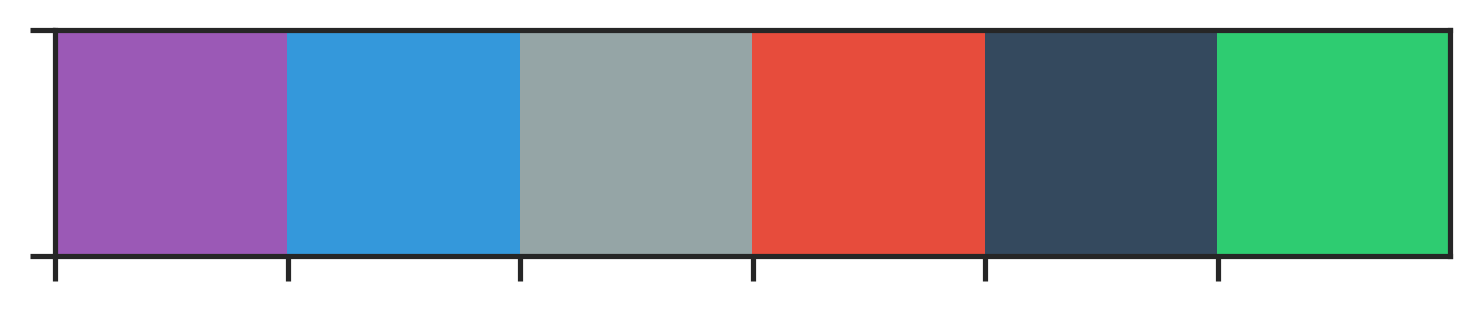

In [3]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
rc={'font.size': 12, 'axes.labelsize': 12, 'legend.fontsize': 12.0, 'figure.dpi':300,
    'axes.titlesize': 12, 'xtick.labelsize': 12, 'ytick.labelsize': 12}
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set(style='ticks',rc=rc)
sns.palplot(sns.color_palette(flatui))

In [4]:
full_top60_features_df = pd.read_csv('top60_features_4.csv')
sel_lipid_df = full_top60_features_df.loc[full_top60_features_df['cat_name']=='lipid',
                                      ['ori_name','true_name']]
sel_metabolic_df = full_top60_features_df.loc[full_top60_features_df['cat_name']=='metabolic',
                                          ['ori_name','true_name']]
sel_proteins_df = full_top60_features_df.loc[full_top60_features_df['cat_name']=='protein',
                                         ['ori_name','true_name']]
sel_mrna_df = full_top60_features_df.loc[full_top60_features_df['cat_name']=='mrna',
                                     ['ori_name','true_name']]



In [5]:
sel_mrna_df.head()

,ori_name,true_name
0,mrna_ALOX15,ALOX15
2,mrna_CDC42EP2,CDC42EP2
10,mrna_C5AR1,C5AR1
11,mrna_C21orf62,C21orf62
14,mrna_PTGS2,PTGS2


In [6]:
norm_train_lipid_df = pd.read_csv('f_data/norm_train_lipid_df_108.csv', sep='\t')
norm_test_lipid_df = pd.read_csv('f_data/norm_test_lipid_df_27.csv', sep='\t')
norm_train_lipid_df = norm_train_lipid_df[list(sel_lipid_df['ori_name'].values)+['label_trans_str']]
norm_test_lipid_df = norm_test_lipid_df[list(sel_lipid_df['ori_name'].values)+['label_trans_str']]
norm_lipid_df = norm_train_lipid_df.append(norm_test_lipid_df).reset_index(drop=True)
norm_lipid_df.rename(columns=dict(zip(list(sel_lipid_df['ori_name'].values)+['label_trans_str'],
                                    list(sel_lipid_df['true_name'].values)+['label_trans_str'])), inplace=True)

norm_train_metabolic_df = pd.read_csv('f_data/norm_train_metabolic_df_108.csv', sep='\t') 
norm_test_metabolic_df = pd.read_csv('f_data/norm_test_metabolic_df_27.csv', sep='\t')
norm_train_metabolic_df = norm_train_metabolic_df[list(sel_metabolic_df['ori_name'].values)+['label_trans_str']]
norm_test_metabolic_df = norm_test_metabolic_df[list(sel_metabolic_df['ori_name'].values)+['label_trans_str']]
norm_matebolic_df = norm_train_metabolic_df.append(norm_test_metabolic_df).reset_index(drop=True)
norm_matebolic_df.rename(columns=dict(zip(list(sel_metabolic_df['ori_name'].values)+['label_trans_str'],
                                    list(sel_metabolic_df['true_name'].values)+['label_trans_str'])), inplace=True)

norm_train_protein_df = pd.read_csv('f_data/norm_train_protein_df_108.csv', sep='\t') 
norm_test_protein_df = pd.read_csv('f_data/norm_test_protein_df_27.csv', sep='\t')
norm_train_protein_df = norm_train_protein_df[list(sel_proteins_df['ori_name'].values)+['label_trans_str']]
norm_test_protein_df = norm_test_protein_df[list(sel_proteins_df['ori_name'].values)+['label_trans_str']]
norm_protein_df = norm_train_protein_df.append(norm_test_protein_df).reset_index(drop=True)
norm_protein_df.rename(columns=dict(zip(list(sel_proteins_df['ori_name'].values)+['label_trans_str'],
                                    list(sel_proteins_df['true_name'].values)+['label_trans_str'])), inplace=True)

norm_train_mrna_df = pd.read_csv('f_data/norm_train_mrna_df_108.csv', sep='\t') 
norm_test_mrna_df = pd.read_csv('f_data/norm_test_mrna_df_27.csv', sep='\t')
norm_train_mrna_df = norm_train_mrna_df[list(sel_mrna_df['ori_name'].values)+['label_trans_str']]
norm_test_mrna_df = norm_test_mrna_df[list(sel_mrna_df['ori_name'].values)+['label_trans_str']]
norm_mrna_df = norm_train_mrna_df.append(norm_test_mrna_df).reset_index(drop=True)
norm_mrna_df.rename(columns=dict(zip(list(sel_mrna_df['ori_name'].values)+['label_trans_str'],
                                    list(sel_mrna_df['true_name'].values)+['label_trans_str'])), inplace=True)



In [7]:
norm_lipid_df['label_trans_str'].value_counts()

Asymptomatic    53
Mild            39
Severe          27
Critical        16
Name: label_trans_str, dtype: int64

In [8]:
norm_lipid_df.head()

,PC(18:2/20:4),LPC(17:0)(rep),Cer(d17:1/22:0),LPC(19:0)(rep),MG(18:1),PC(14:0/20:5),ChE(18:3),label_trans_str
0,0.155210,-0.507855,-1.474003,-0.421297,-0.635071,1.189788,-0.159926,Asymptomatic
1,1.147930,0.095643,-0.948629,-0.112808,-0.591501,-0.040995,-0.172071,Asymptomatic
2,1.853152,-0.440438,-0.582849,0.213588,-0.541656,-0.737092,-0.169677,Asymptomatic
3,0.602660,1.116164,-0.636825,1.263388,-0.524073,-0.686885,-0.164138,Asymptomatic
4,0.942655,-0.030539,-0.385660,-0.340802,-0.503166,-0.340864,-0.177035,Asymptomatic


In [9]:
palette = dict({'Asymptomatic':"#5cb85c", 'Mild':"#337ab7", 'Severe':"#f0ad4e", 'Critical':"#d9534f"})

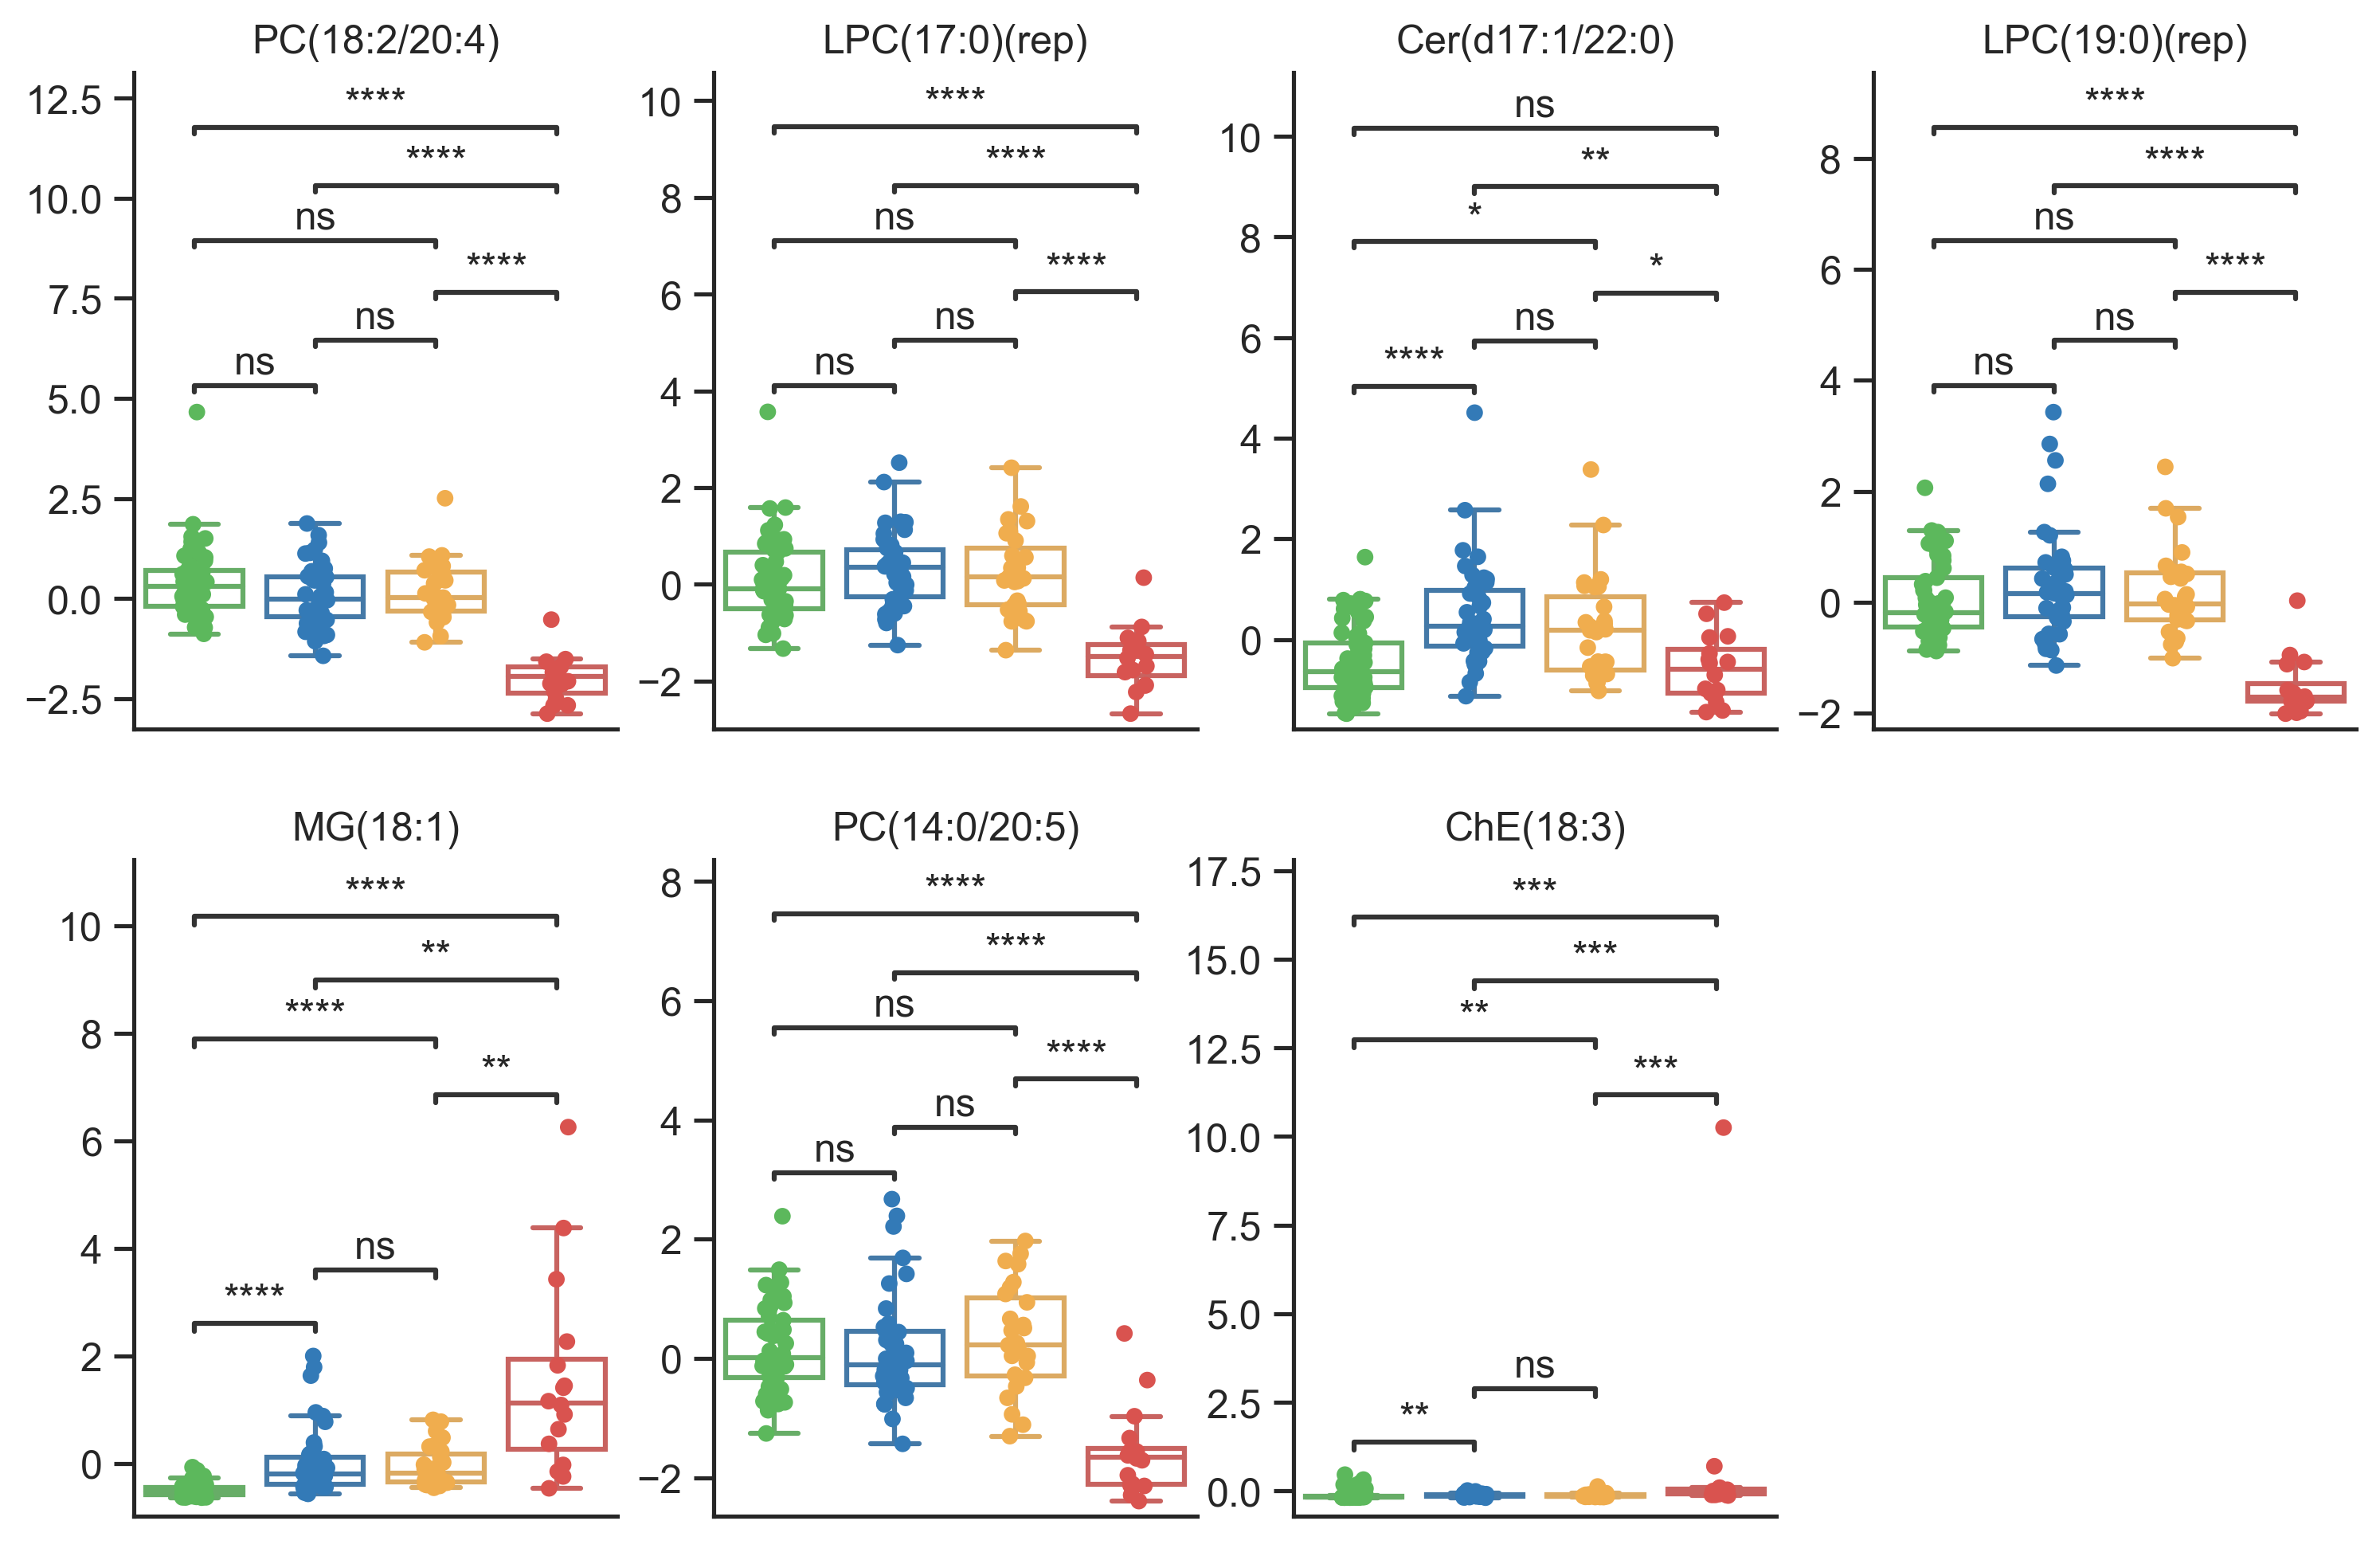

In [12]:
# lipid 

from statannot import add_stat_annotation

fig, axs = plt.subplots(2, round((norm_lipid_df.shape[1]-1)/2), figsize=(12,8))
orders = ['Asymptomatic', 'Mild', 'Severe', 'Critical']
axs = axs.ravel()

col_names = norm_lipid_df.columns.to_list()[:-1]
for k in range(norm_lipid_df.shape[1]-1):
    
    sns.stripplot(x="label_trans_str", y=norm_lipid_df.iloc[:,k], data=norm_lipid_df, 
                  ax = axs[k],palette=palette,order = orders)
    axa = sns.boxplot(x="label_trans_str", y=norm_lipid_df.iloc[:,k], data=norm_lipid_df,  
                      ax = axs[k],palette=palette, showfliers=False, order = orders)
    
    
    for i,artist in enumerate(axa.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*5,i*5+5):
            line = axa.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
    add_stat_annotation(axa, data=norm_lipid_df, x="label_trans_str", y=norm_lipid_df.iloc[:,k], order=orders,
                                   box_pairs=[('Asymptomatic', 'Mild'), 
                                              ('Asymptomatic', 'Severe'), 
                                              ('Asymptomatic', 'Critical'),
                                              ('Mild', 'Severe'),
                                              ('Mild', 'Critical'),
                                              ('Severe', 'Critical')],
                                   test='Mann-Whitney', text_format='star',#comparisons_correction=None,
                                   loc='inside', verbose=0)
        #'Asymptomatic', 'Mild', 'Severe', 'Critical'
        # : param comparisons_correction: Method for multiple comparisons correction. `bonferroni` or None.
    axa.set_xlabel('')
    axa.set_ylabel('')
    axa.set_title(col_names[k])
    axa.axes.get_xaxis().set_visible(False)
    sns.despine()
    
fig.delaxes(axs[7])
plt.savefig("f_result/fs_top_lipid_dist.pdf", bbox_inches='tight', pad_inches = 0.1)


In [13]:
norm_matebolic_df.shape[1]

12

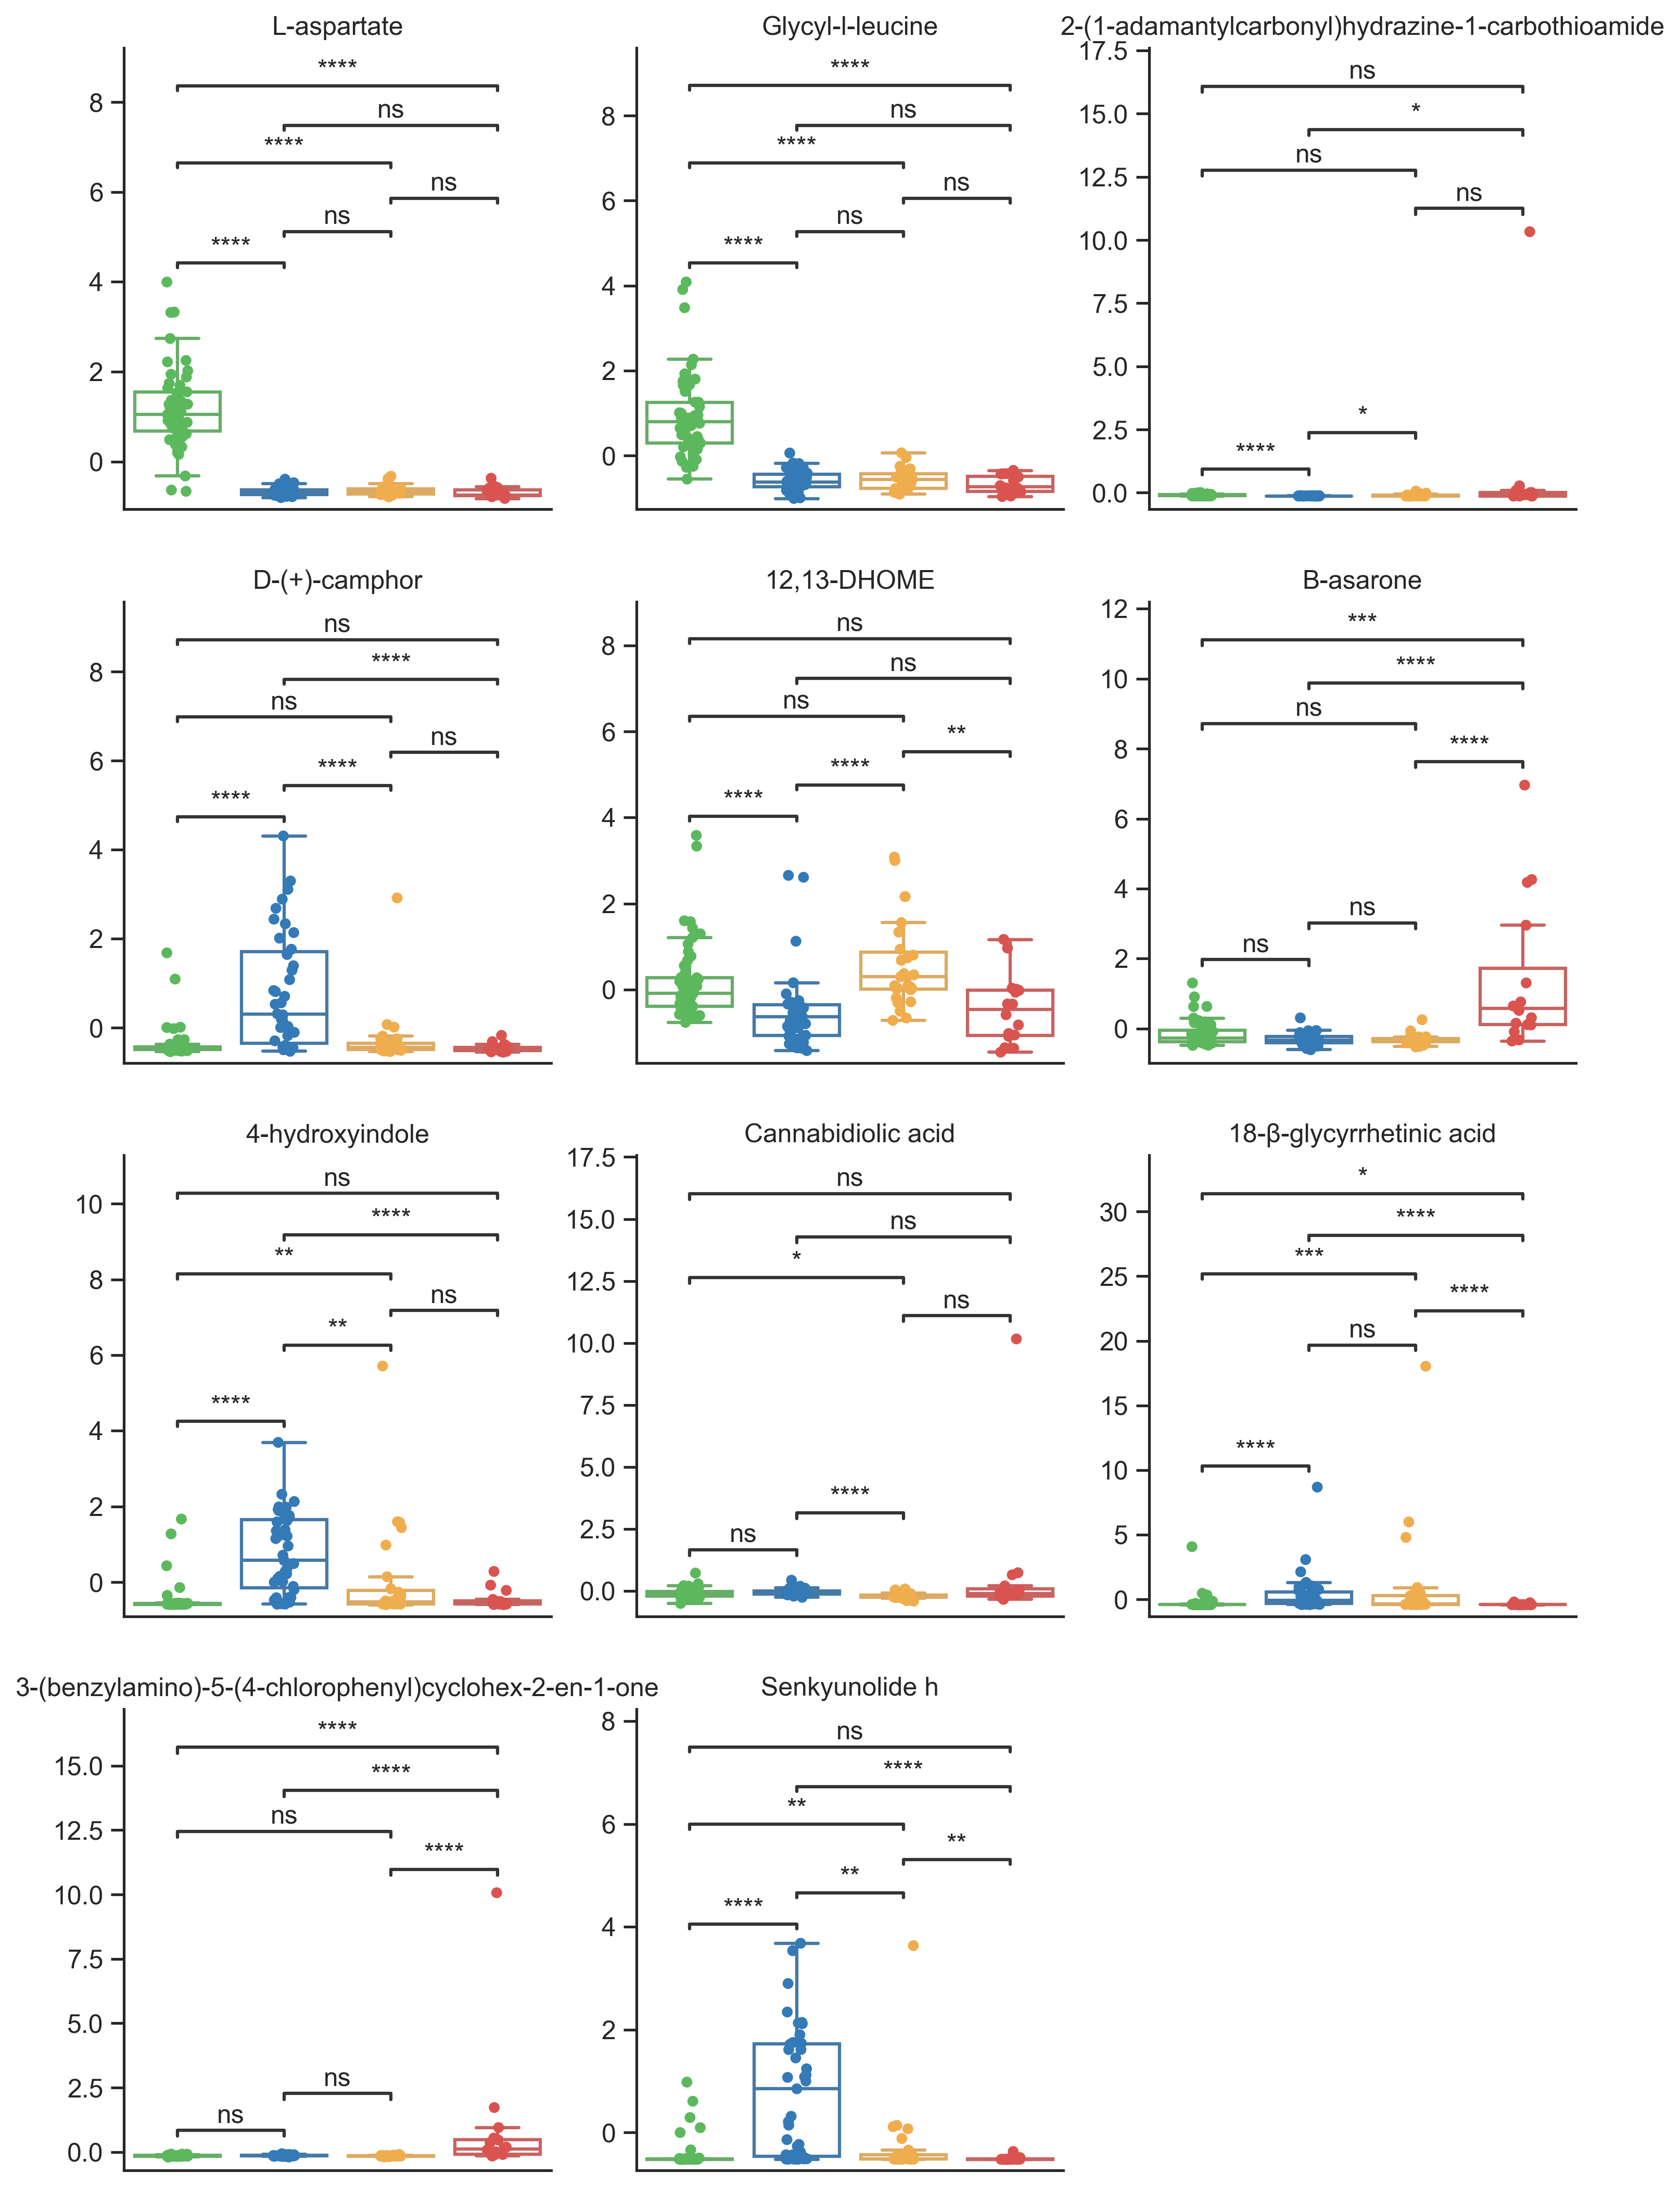

In [15]:
# matebolic 

from statannot import add_stat_annotation

fig, axs = plt.subplots(4, round((norm_matebolic_df.shape[1]-1)/4), figsize=(12,18))
orders = ['Asymptomatic', 'Mild', 'Severe', 'Critical']
axs = axs.ravel()

col_names = norm_matebolic_df.columns.to_list()[:-1]
for k in range(norm_matebolic_df.shape[1]-1):
    
    sns.stripplot(x="label_trans_str", y=norm_matebolic_df.iloc[:,k], data=norm_matebolic_df, 
                  ax = axs[k],palette=palette,order = orders)
    axa = sns.boxplot(x="label_trans_str", y=norm_matebolic_df.iloc[:,k], data=norm_matebolic_df,  
                      ax = axs[k],palette=palette, showfliers=False, order = orders)
    
    
    for i,artist in enumerate(axa.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*5,i*5+5):
            line = axa.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
    add_stat_annotation(axa, data=norm_matebolic_df, x="label_trans_str", y=norm_matebolic_df.iloc[:,k], order=orders,
                                   box_pairs=[('Asymptomatic', 'Mild'), 
                                              ('Asymptomatic', 'Severe'), 
                                              ('Asymptomatic', 'Critical'),
                                              ('Mild', 'Severe'),
                                              ('Mild', 'Critical'),
                                              ('Severe', 'Critical')],
                                   test='Mann-Whitney', text_format='star',# comparisons_correction=None,
                                   loc='inside', verbose=0)
        #'Asymptomatic', 'Mild', 'Severe', 'Critical'
    axa.set_xlabel('')
    axa.set_ylabel('')
    axa.set_title(col_names[k])
    axa.axes.get_xaxis().set_visible(False)
    sns.despine()
    
fig.delaxes(axs[11])
plt.savefig("f_result/fs_top_matebolic_dist.pdf", bbox_inches='tight', pad_inches = 0.1)


In [16]:
norm_protein_df.shape

(135, 20)

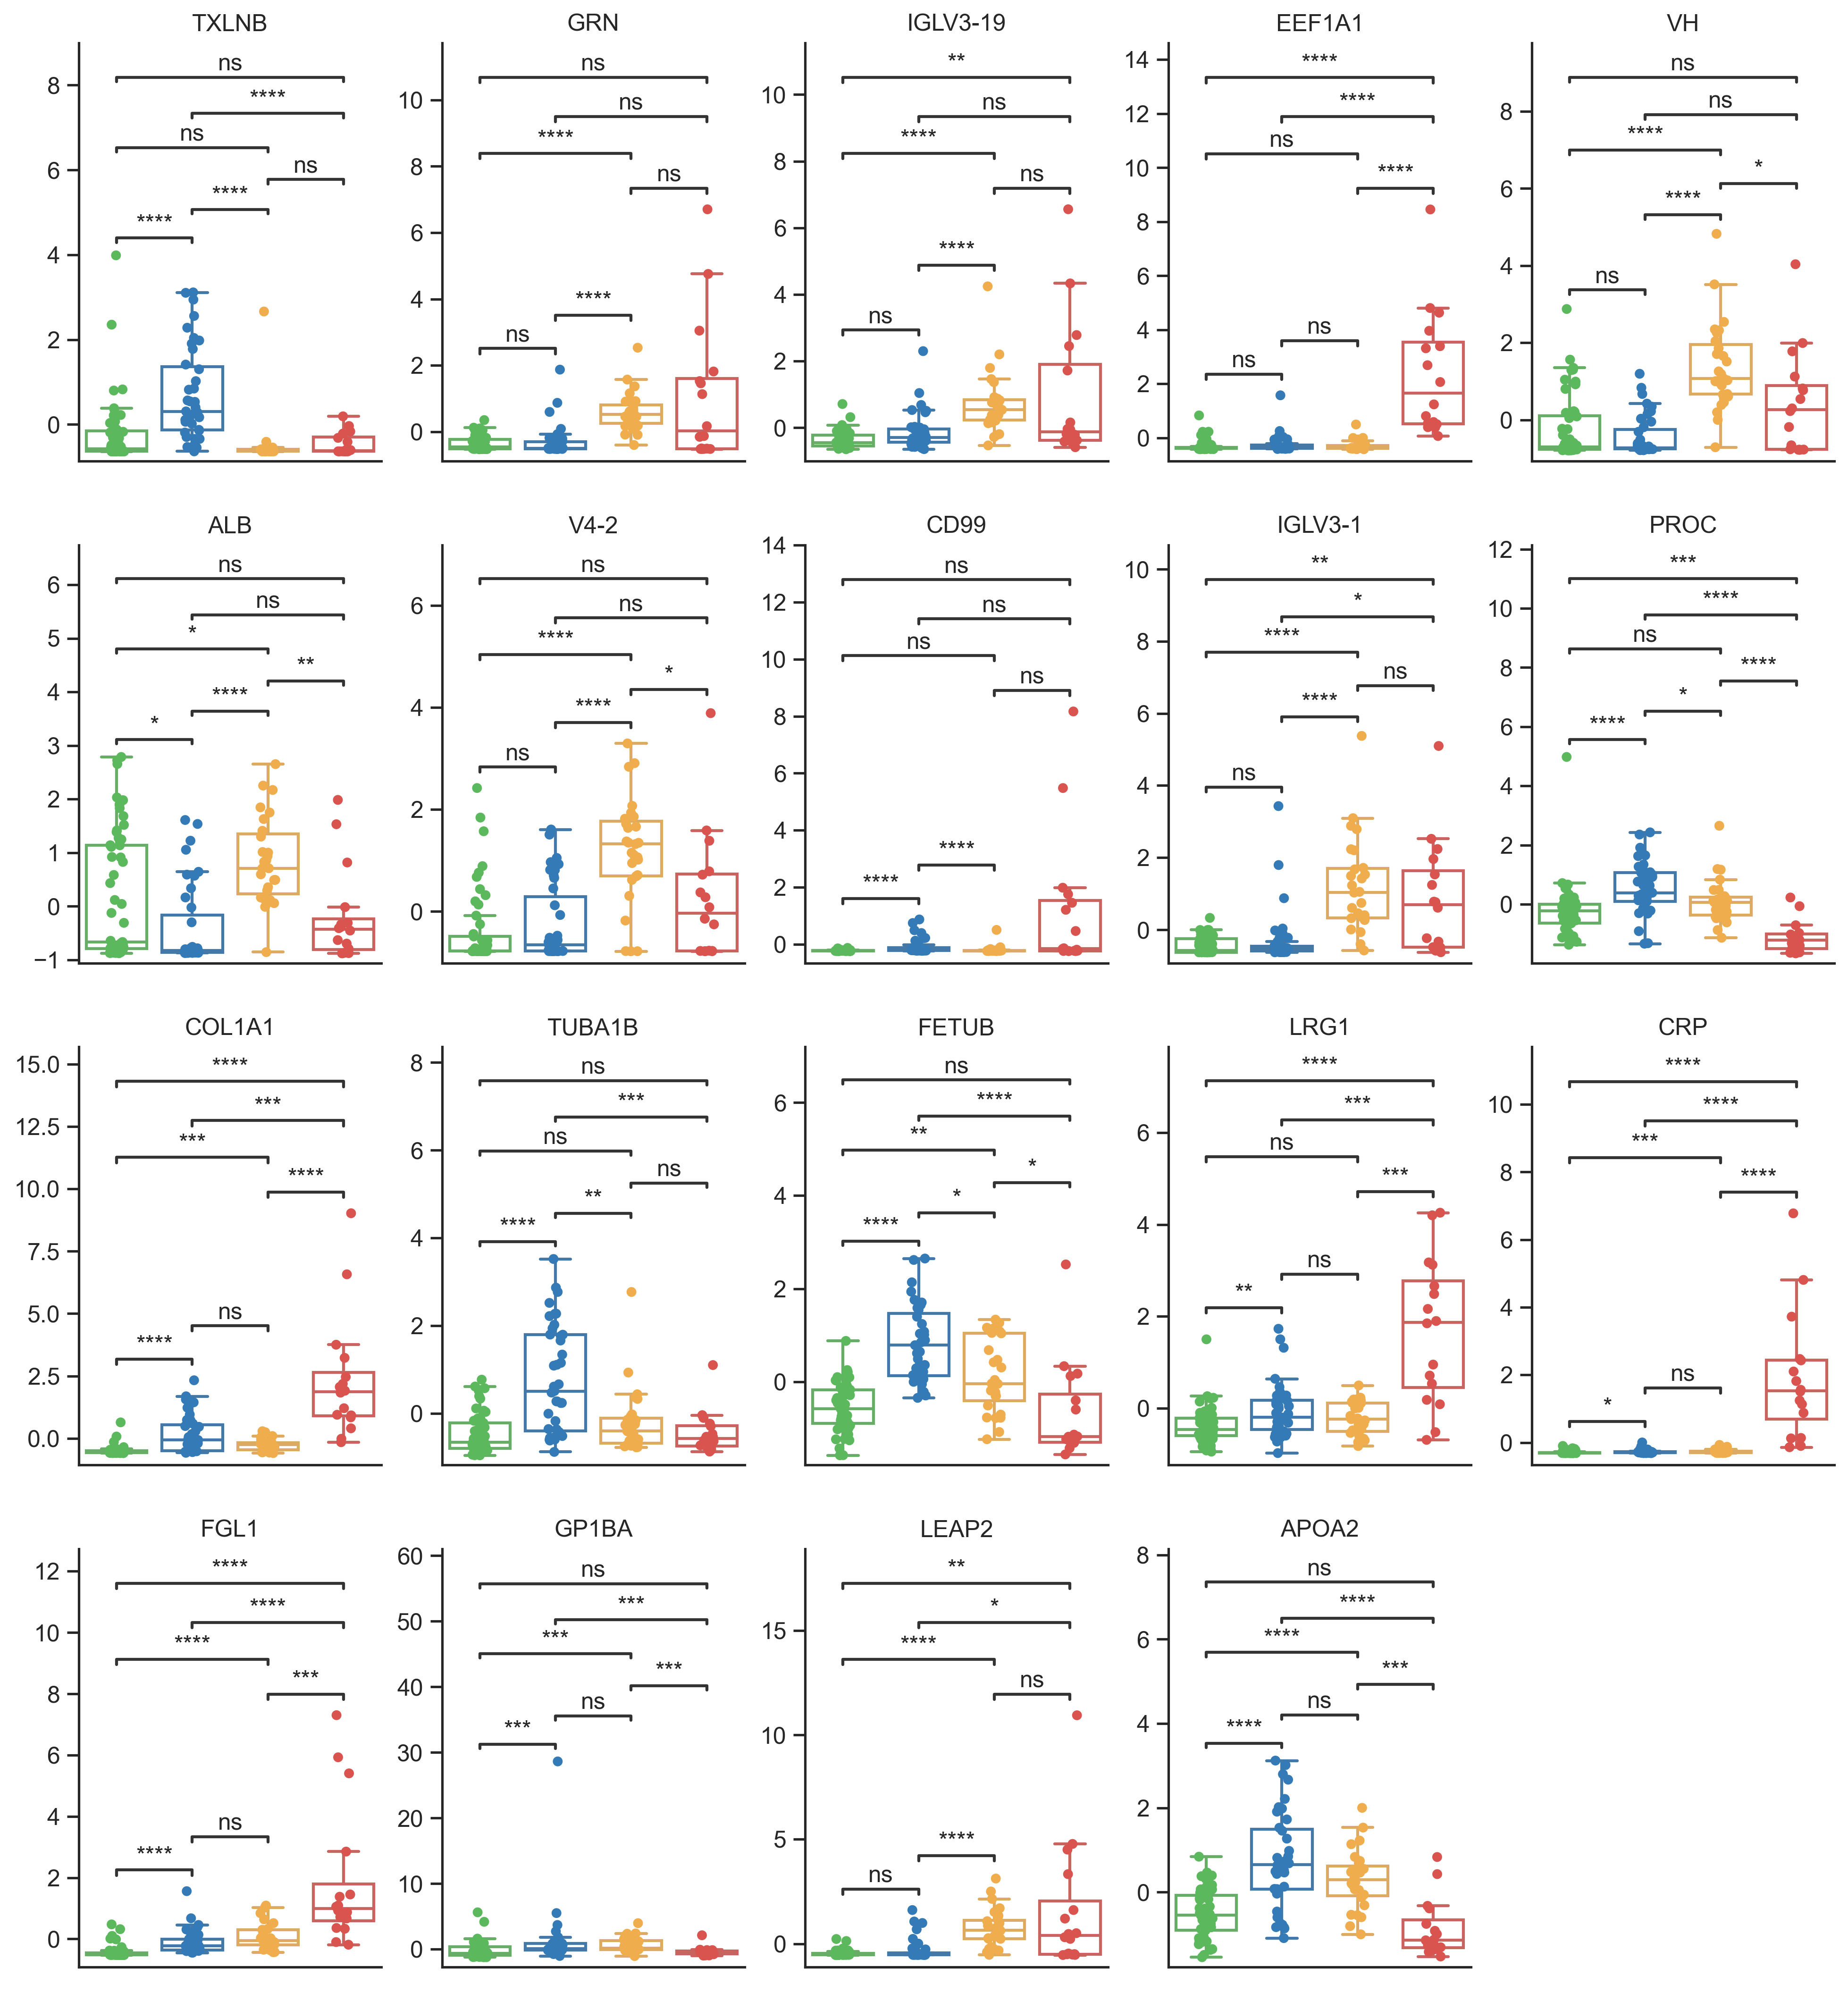

In [17]:
# protein 

from statannot import add_stat_annotation

fig, axs = plt.subplots(4, round((norm_protein_df.shape[1]-1)/4), figsize=(16,18))
orders = ['Asymptomatic', 'Mild', 'Severe', 'Critical']
axs = axs.ravel()

col_names = norm_protein_df.columns.to_list()[:-1]
for k in range(norm_protein_df.shape[1]-1):
    
    sns.stripplot(x="label_trans_str", y=norm_protein_df.iloc[:,k], data=norm_protein_df, 
                  ax = axs[k],palette=palette,order = orders)
    axa = sns.boxplot(x="label_trans_str", y=norm_protein_df.iloc[:,k], data=norm_protein_df,  
                      ax = axs[k],palette=palette, showfliers=False, order = orders)
    
    
    for i,artist in enumerate(axa.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*5,i*5+5):
            line = axa.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
    add_stat_annotation(axa, data=norm_protein_df, x="label_trans_str", y=norm_protein_df.iloc[:,k], order=orders,
                                   box_pairs=[('Asymptomatic', 'Mild'), 
                                              ('Asymptomatic', 'Severe'), 
                                              ('Asymptomatic', 'Critical'),
                                              ('Mild', 'Severe'),
                                              ('Mild', 'Critical'),
                                              ('Severe', 'Critical')],
                                   test='Mann-Whitney', text_format='star',# comparisons_correction=None,
                                   loc='inside', verbose=0)
        #'Asymptomatic', 'Mild', 'Severe', 'Critical'
    axa.set_xlabel('')
    axa.set_ylabel('')
    axa.set_title(col_names[k])
    axa.axes.get_xaxis().set_visible(False)
    sns.despine()
    
fig.delaxes(axs[19])
plt.savefig("f_result/fs_top_protein_dist.pdf", bbox_inches='tight', pad_inches = 0.1)


In [18]:
norm_mrna_df.shape

(135, 24)

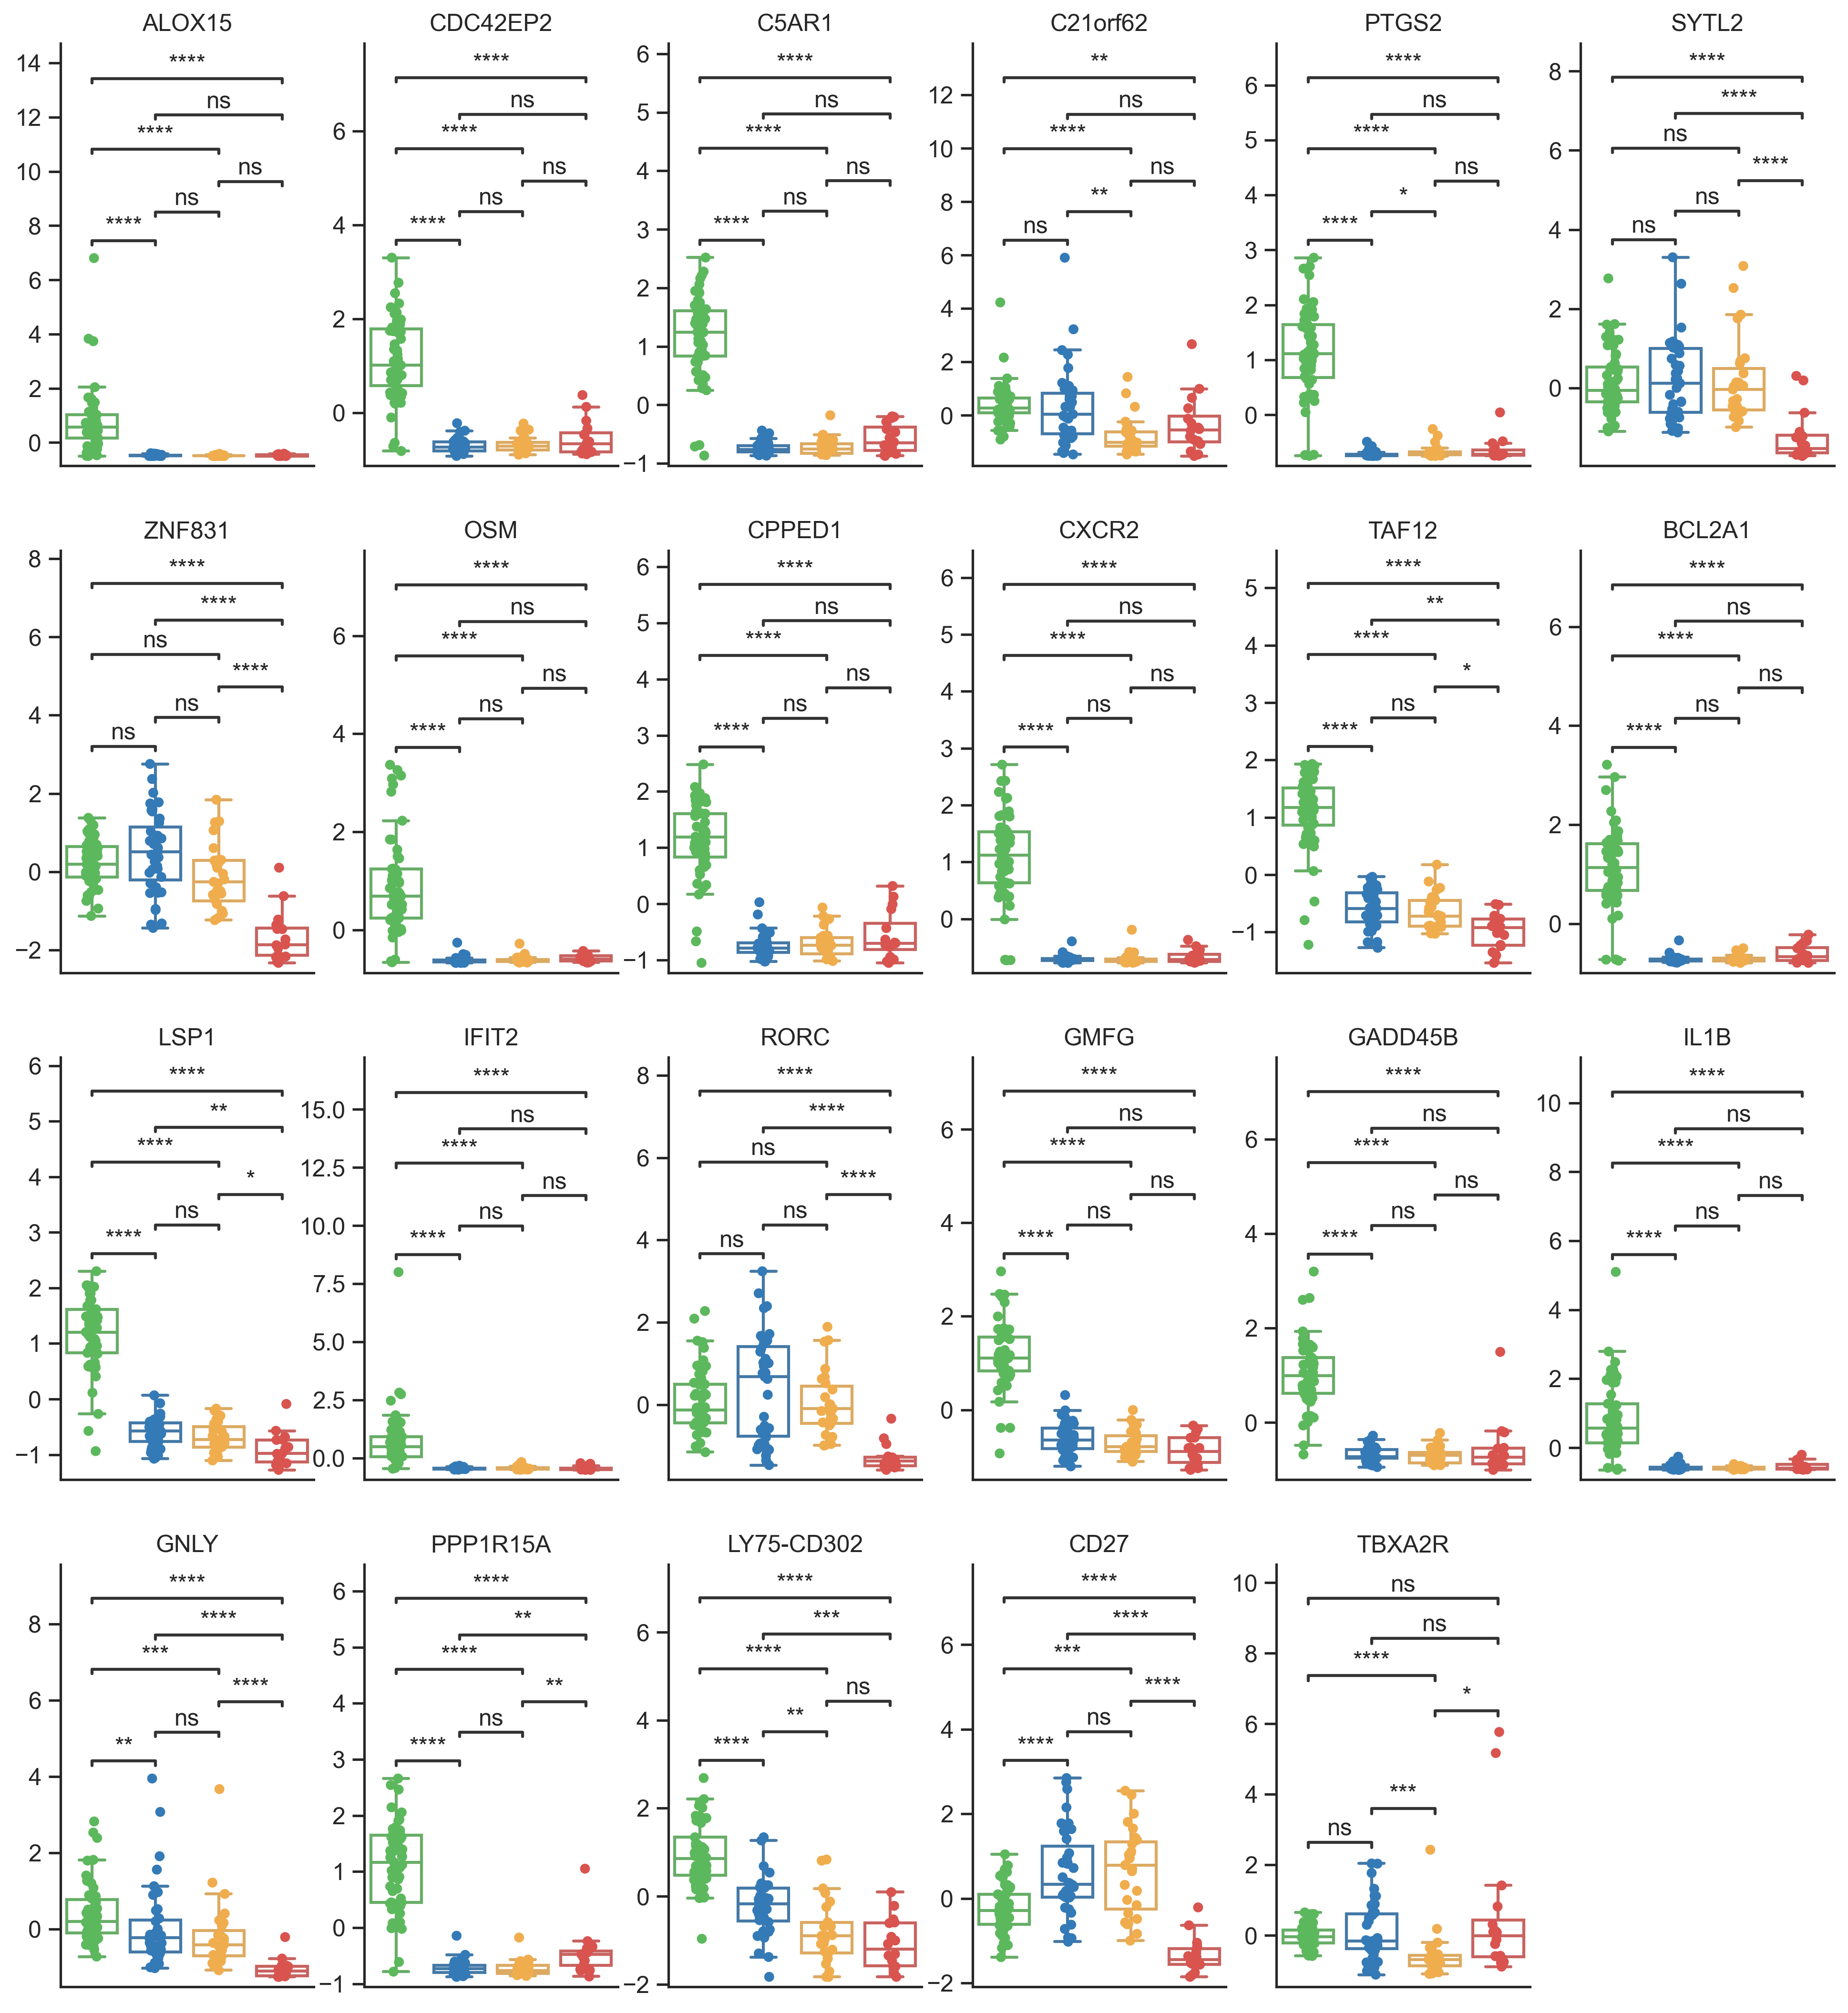

In [19]:
# mrna 

from statannot import add_stat_annotation

fig, axs = plt.subplots(4, round((norm_mrna_df.shape[1]-1)/4), figsize=(16,18))
orders = ['Asymptomatic', 'Mild', 'Severe', 'Critical']
axs = axs.ravel()

col_names = norm_mrna_df.columns.to_list()[:-1]
for k in range(norm_mrna_df.shape[1]-1):
    
    sns.stripplot(x="label_trans_str", y=norm_mrna_df.iloc[:,k], data=norm_mrna_df, 
                  ax = axs[k],palette=palette,order = orders)
    axa = sns.boxplot(x="label_trans_str", y=norm_mrna_df.iloc[:,k], data=norm_mrna_df,  
                      ax = axs[k],palette=palette, showfliers=False, order = orders)
    
    
    for i,artist in enumerate(axa.artists):
        # Set the linecolor on the artist to the facecolor, and set the facecolor to None
        col = artist.get_facecolor()
        artist.set_edgecolor(col)
        artist.set_facecolor('None')

        # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
        # Loop over them here, and use the same colour as above
        for j in range(i*5,i*5+5):
            line = axa.lines[j]
            line.set_color(col)
            line.set_mfc(col)
            line.set_mec(col)
    add_stat_annotation(axa, data=norm_mrna_df, x="label_trans_str", y=norm_mrna_df.iloc[:,k], order=orders,
                                   box_pairs=[('Asymptomatic', 'Mild'), 
                                              ('Asymptomatic', 'Severe'), 
                                              ('Asymptomatic', 'Critical'),
                                              ('Mild', 'Severe'),
                                              ('Mild', 'Critical'),
                                              ('Severe', 'Critical')],
                                   test='Mann-Whitney', text_format='star',#comparisons_correction=None,
                                   loc='inside', verbose=0)
        #'Asymptomatic', 'Mild', 'Severe', 'Critical'
    axa.set_xlabel('')
    axa.set_ylabel('')
    axa.set_title(col_names[k])
    axa.axes.get_xaxis().set_visible(False)
    sns.despine()
    
fig.delaxes(axs[23])
plt.savefig("f_result/fs_top_mrna_dist.pdf", bbox_inches='tight', pad_inches = 0.1)
